# Contents
1) **Dependencies**
2) **Data Extraction**
3) **Data Wrangling**
4) **Machine Learning Models**
5) **Advanced Machine Learning Models**
6) **Results Analysis**

# 1) Dependencies
This section is for importing any relevent dependencies for this project.

In [1]:
import numpy as np
import pandas as pd
import os
from IPython.display import display
import chardet
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import json
import string

# 2) Data Extraction
I used Kaggle's Input directory to simplify the process of accumulating data into one single directory. <br>
I went through all the datasets individually and included them all in `/kaggle/inputs` so that I can parse through them all at once.
<!-- <br> -->
<!-- 
**Following is the list of all English datasets from the list provided** (with file names in `/kaggle/inputs` for reference)**, marking the ones used:**
- [ ] [WELFake dataset](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification) **(fake-news-classification)**
- [ ] [ISOT Fake News Dataset](https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets) **(fake-news-detection-datasets)**
- [ ] [FakeNewsNet created by ASU](https://www.kaggle.com/datasets/mdepak/fakenewsnet) **(fakenewsnet)**
- [ ] [The LIAR Benchmark dataset](https://www.kaggle.com/datasets/lucihere/liar-dataset) **(liar-dataset)**
- [x] [PHEME dataset for Rumour Detection and Veracity Classification](https://www.kaggle.com/datasets/usharengaraju/pheme-dataset?select=PHEME_veracity) **(pheme-data)**
- [ ] [Truth Seeker Dataset 2023](https://www.kaggle.com/datasets/paulinepeps/truth-seeker-dataset-2023-truthseeker2023) **(truth-seeker-dataset-2023-truthseeker2023)**
- [ ] ["Fake News", another unnamed dataset from Kaggle](https://www.kaggle.com/datasets/hassanamin/textdb3/data) **(textdb3)**
- [x] ["TwitterFakeNews", a GitHub repository of scraped Twitter data](https://github.com/s-helm/twitterfakenews) **(twitterfakenews)**
- [ ] ["Fake and Real News Data", an unnamed dataset from Kaggle](https://www.kaggle.com/datasets/subhajournal/fake-and-real-news-data) **(fake-and-real-news-data)**
- [ ] [Fighting an Infodemic: COVID-19 Fake News Dataset](https://arxiv.org/ftp/arxiv/papers/2011/2011.03327.pdf) **()** -->

## 2.1) CSV file retrieval
The PHEME dataset is the only dataset that has events/data points split into seperate subdirectories, so we will deal with it later.<br>
For this section, even with a lot of subdirectories, metadata and other files to go through individually, a brief overview of the data shows the existence of many text files, CSV and TSV files in every dataset. So I'll create a script to go through all of the directories and just retrieve all them.<br>

In [5]:
# Lists to store DataFrames and data files
text_files = []
csv_dataframes = []
tsv_dataframes = []

# Lists to store the corresponding paths and filenames for reference
bad_pathnames = []
txt_pathnames = []
csv_pathnames = []
tsv_pathnames = []

bad_filenames = []
txt_filenames = []
csv_filenames = []
tsv_filenames = []

count_txt = 0
count_csv = 0
count_tsv = 0

for dirname, _, filenames_in_dir in os.walk('/kaggle/input'):
    for filename in filenames_in_dir:
        # Check if the file is a txt file
        if filename.endswith('.txt'):
            file_path = os.path.join(dirname, filename)
            print(f"Found Text file {count_txt}: {file_path}")
            count_txt += 1
            try:
                with open(file_path) as f:
                    data = f.read()
                    text_files.append(data)
                    txt_pathnames.append(file_path)
                    txt_filenames.append(filename)
            except Exception as e:
                print(f"  - Error loading {file_path}: {str(e)}")
                print("-" * 80)
                bad_pathnames.append(file_path)
                bad_filenames.append(filename)
            pass
        
        # Check if the file is a CSV file
        if filename.endswith('.csv'):
            file_path = os.path.join(dirname, filename)
            print(f"Found CSV file {count_csv}: {file_path}")
            count_csv += 1
            try:
                df = pd.read_csv(file_path)
                csv_dataframes.append(df)
                csv_pathnames.append(file_path)
                csv_filenames.append(filename)

            except Exception as e:
                try: 
                    with open(file_path, 'rb') as f:
                        data = f.read()
                    encoding = chardet.detect(data)["encoding"]
                    df = pd.read_csv(file_path, sep='delimiter', encoding=encoding, header=None, on_bad_lines='warn')
                    csv_dataframes.append(df)
                    csv_pathnames.append(file_path)
                    csv_filenames.append(filename)
            
                except Exception as e:
                    print(f"  - Error loading {file_path}: {str(e)}")
                    print("-" * 80)
                    bad_pathnames.append(file_path)
                    bad_filenames.append(filename)
            pass
            
        #Check if a file is a TSV file
        if filename.endswith('.tsv'):
            file_path = os.path.join(dirname, filename)
            print(f"Found TSV file {count_tsv}: {file_path}")
            count_tsv += 1
            try:
                df = pd.read_csv(file_path, sep='\t')
                tsv_dataframes.append(df)
                tsv_pathnames.append(file_path)
                tsv_filenames.append(filename)
                
            except Exception as e:
                try: 
                    with open(file_path, 'rb') as f:
                        data = f.read()
                    encoding = chardet.detect(data)["encoding"]
                    df = pd.read_csv(file_path, sep='\t', encoding=encoding)
                    tsv_dataframes.append(df)
                    tsv_pathnames.append(file_path)
                    tsv_filenames.append(filename)
                
                except Exception as e:
                    print(f"  - Error loading {file_path}: {str(e)}")
                    print("-" * 80)
                    bad_pathnames.append(file_path)
                    bad_filenames.append(filename)
            pass

Found CSV file 0: /kaggle/input/fake-and-real-news-data/Fake_Real_News_Data.csv
Found CSV file 1: /kaggle/input/fake-news-detection-datasets/News _dataset/True.csv
Found CSV file 2: /kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv
Found Text file 0: /kaggle/input/fakenewsnet/PolitiFactNews.txt
Found Text file 1: /kaggle/input/fakenewsnet/PolitiFactUser.txt
Found Text file 2: /kaggle/input/fakenewsnet/BuzzFeedNews.txt
Found CSV file 3: /kaggle/input/fakenewsnet/PolitiFact_real_news_content.csv
Found CSV file 4: /kaggle/input/fakenewsnet/PolitiFact_fake_news_content.csv
Found CSV file 5: /kaggle/input/fakenewsnet/BuzzFeed_real_news_content.csv
Found Text file 3: /kaggle/input/fakenewsnet/BuzzFeedNewsUser.txt
Found Text file 4: /kaggle/input/fakenewsnet/BuzzFeedUser.txt
Found Text file 5: /kaggle/input/fakenewsnet/PolitiFactUserUser.txt
Found Text file 6: /kaggle/input/fakenewsnet/BuzzFeedUserUser.txt
Found CSV file 6: /kaggle/input/fakenewsnet/BuzzFeed_fake_news_content.

In [6]:
print(f"Total Text Files gathered: {len(text_files)}")
print(f"Total CSV DataFrames created: {len(csv_dataframes)}")
print(f"Total TSV DataFrames created: {len(tsv_dataframes)}")
print(f"Total Corrupted files: {len(bad_filenames)}")

dataframes = csv_dataframes + tsv_dataframes
filenames = csv_filenames + tsv_filenames
pathnames = csv_pathnames + tsv_pathnames

if text_files:
    print("\n\nAvailable Text Files:")
    for i, (filename, text_file) in enumerate(zip(txt_filenames, text_files)):
        print(f"  - Text File #{i}: '{filename}'")
        
if csv_dataframes:
    print("\n\nAvailable CSV DataFrames:")
    for i, (filename, df) in enumerate(zip(csv_filenames, csv_dataframes)):
        print(f"  - CSV DataFrame #{i}: '{filename}' with shape {df.shape}")

if tsv_dataframes:
    print("\n\nAvailable TSV DataFrames:")
    for i, (filename, df) in enumerate(zip(tsv_filenames, tsv_dataframes)):
        print(f"  - TSV DataFrame #{i}: '{filename}' with shape {df.shape}")

if bad_filenames:
    print("\n\nCorrupted data files:")
    for i, filename in enumerate(bad_filenames):
        print(f"  - Corrupted file #{i}: '{filename}'")

Total Text Files gathered: 9
Total CSV DataFrames created: 14
Total TSV DataFrames created: 3
Total Corrupted files: 0


Available Text Files:
  - Text File #0: 'PolitiFactNews.txt'
  - Text File #1: 'PolitiFactUser.txt'
  - Text File #2: 'BuzzFeedNews.txt'
  - Text File #3: 'BuzzFeedNewsUser.txt'
  - Text File #4: 'BuzzFeedUser.txt'
  - Text File #5: 'PolitiFactUserUser.txt'
  - Text File #6: 'BuzzFeedUserUser.txt'
  - Text File #7: 'PolitiFactNewsUser.txt'
  - Text File #8: 'readme.txt'


Available CSV DataFrames:
  - CSV DataFrame #0: 'Fake_Real_News_Data.csv' with shape (6335, 4)
  - CSV DataFrame #1: 'True.csv' with shape (21417, 4)
  - CSV DataFrame #2: 'Fake.csv' with shape (23481, 4)
  - CSV DataFrame #3: 'PolitiFact_real_news_content.csv' with shape (120, 12)
  - CSV DataFrame #4: 'PolitiFact_fake_news_content.csv' with shape (120, 12)
  - CSV DataFrame #5: 'BuzzFeed_real_news_content.csv' with shape (91, 12)
  - CSV DataFrame #6: 'BuzzFeed_fake_news_content.csv' with shape (9

#### **Run the cell below to get a glimpse of each dataframe and which file it points to.**

In [7]:
for i in range(len(dataframes)):
    print(f"\n{i}) {filenames[i]}")
    print(f"Filepath: {pathnames[i]}")
    print(f"Number of rows:{dataframes[i].shape}\n")
    # display(dataframes[i].head(1))


0) Fake_Real_News_Data.csv
Filepath: /kaggle/input/fake-and-real-news-data/Fake_Real_News_Data.csv
Number of rows:(6335, 4)


1) True.csv
Filepath: /kaggle/input/fake-news-detection-datasets/News _dataset/True.csv
Number of rows:(21417, 4)


2) Fake.csv
Filepath: /kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv
Number of rows:(23481, 4)


3) PolitiFact_real_news_content.csv
Filepath: /kaggle/input/fakenewsnet/PolitiFact_real_news_content.csv
Number of rows:(120, 12)


4) PolitiFact_fake_news_content.csv
Filepath: /kaggle/input/fakenewsnet/PolitiFact_fake_news_content.csv
Number of rows:(120, 12)


5) BuzzFeed_real_news_content.csv
Filepath: /kaggle/input/fakenewsnet/BuzzFeed_real_news_content.csv
Number of rows:(91, 12)


6) BuzzFeed_fake_news_content.csv
Filepath: /kaggle/input/fakenewsnet/BuzzFeed_fake_news_content.csv
Number of rows:(91, 12)


7) fake_or_real_news.csv
Filepath: /kaggle/input/textdb3/fake_or_real_news.csv
Number of rows:(6335, 4)


8) WELFake_Datase

#### **NOTE 2.1.1)**
Looking through the text files, I could find a lot of unnecessary data that wont be useful to us in any way, so Ill skip them altogether. Feel free to verify by running `print(text_files[0])` in a new cell. You can choose any of the indices apart from 0, I dont recommend printing everything, since there is a huge chunk of data and it takes a lot of time to even print.

## 2.2) PHEME Dataset Retrieval
The following code is for individually going through all the sub-directories in the PHEME Veracity Dataset.

In [8]:
jsons = glob("/kaggle/input/pheme-data/**/*.json", recursive=True)
annotation_path = ""
source_tweets_path = ""

In [51]:
pheme_data = []
for i in jsons:
    #This skips over hidden binary files
    if i.startswith("."):
        continue

    elif "non-rumours/" in i:
        source_tweets_path = i
        if os.path.exists(source_tweets_path):
            with open(source_tweets_path, "r", encoding="utf-8") as f:
                tweet_data = json.load(f)
                if "text" in tweet_data:
                    label = 0
                    pheme_data.append({"text": tweet_data["text"], "label": label})
                else:
                    continue
                    
    elif "rumours/" in i and not "non-rumours" in i:
        source_tweets_path = i
        if os.path.exists(source_tweets_path):
            with open(source_tweets_path, "r", encoding="utf-8") as f:
                tweet_data = json.load(f)
                if "text" in tweet_data:
                    label = 1
                    pheme_data.append({"text": tweet_data["text"], "label": label})
                else:
                    continue
                
    # elif "/source-tweets" in i:
    #     source_tweets_path = i
    #     if os.path.exists(source_tweets_path):
    #         with open(source_tweets_path, "r", encoding="utf-8") as f:
    #             tweet_data = json.load(f)

    # elif i.endswith("annotation.json"):
    #     annotation_path = i

    #     if os.path.exists(annotation_path):
    #         with open(annotation_path, "r", encoding="utf-8") as f:
    #             annotation = json.load(f)
    #             if annotation.get("is_rumour")=="rumour": # Assign label from the annotation JSON
    #                 label = 1
    #             elif annotation.get("is_rumour")=="nonrumour":
    #                 label = 0
    else:
        label = pd.NA
        pheme_data.append({"text": pd.NA, "label": label})

#### **NOTE 2.2.1)** 
The above code only extracted the JSON files which are processable and have relevant annotations. There are a lot of sub directories that I believe the dataset was partly corrupted.<br><br>
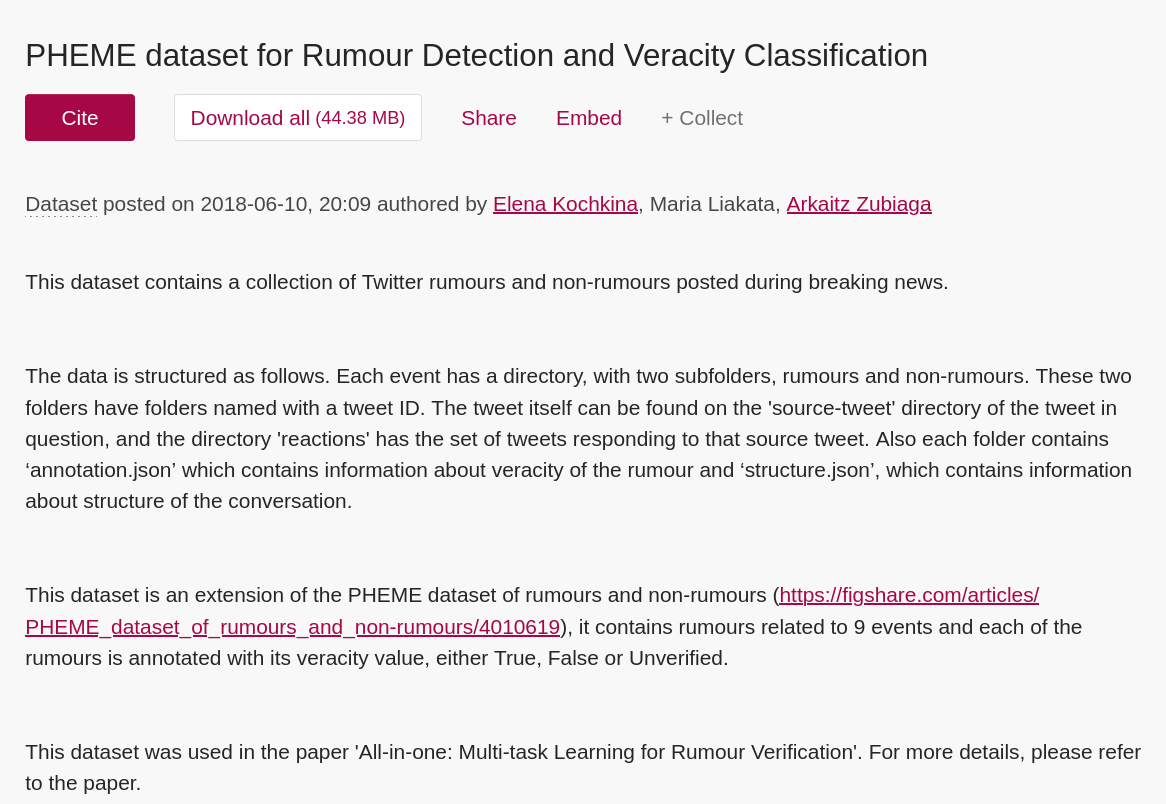<br>
**Fig. 1) Based on this official dataset's description, there shouldve be more tweets from 9 different events, but 7 among them were corrupted.** <br><br><br>
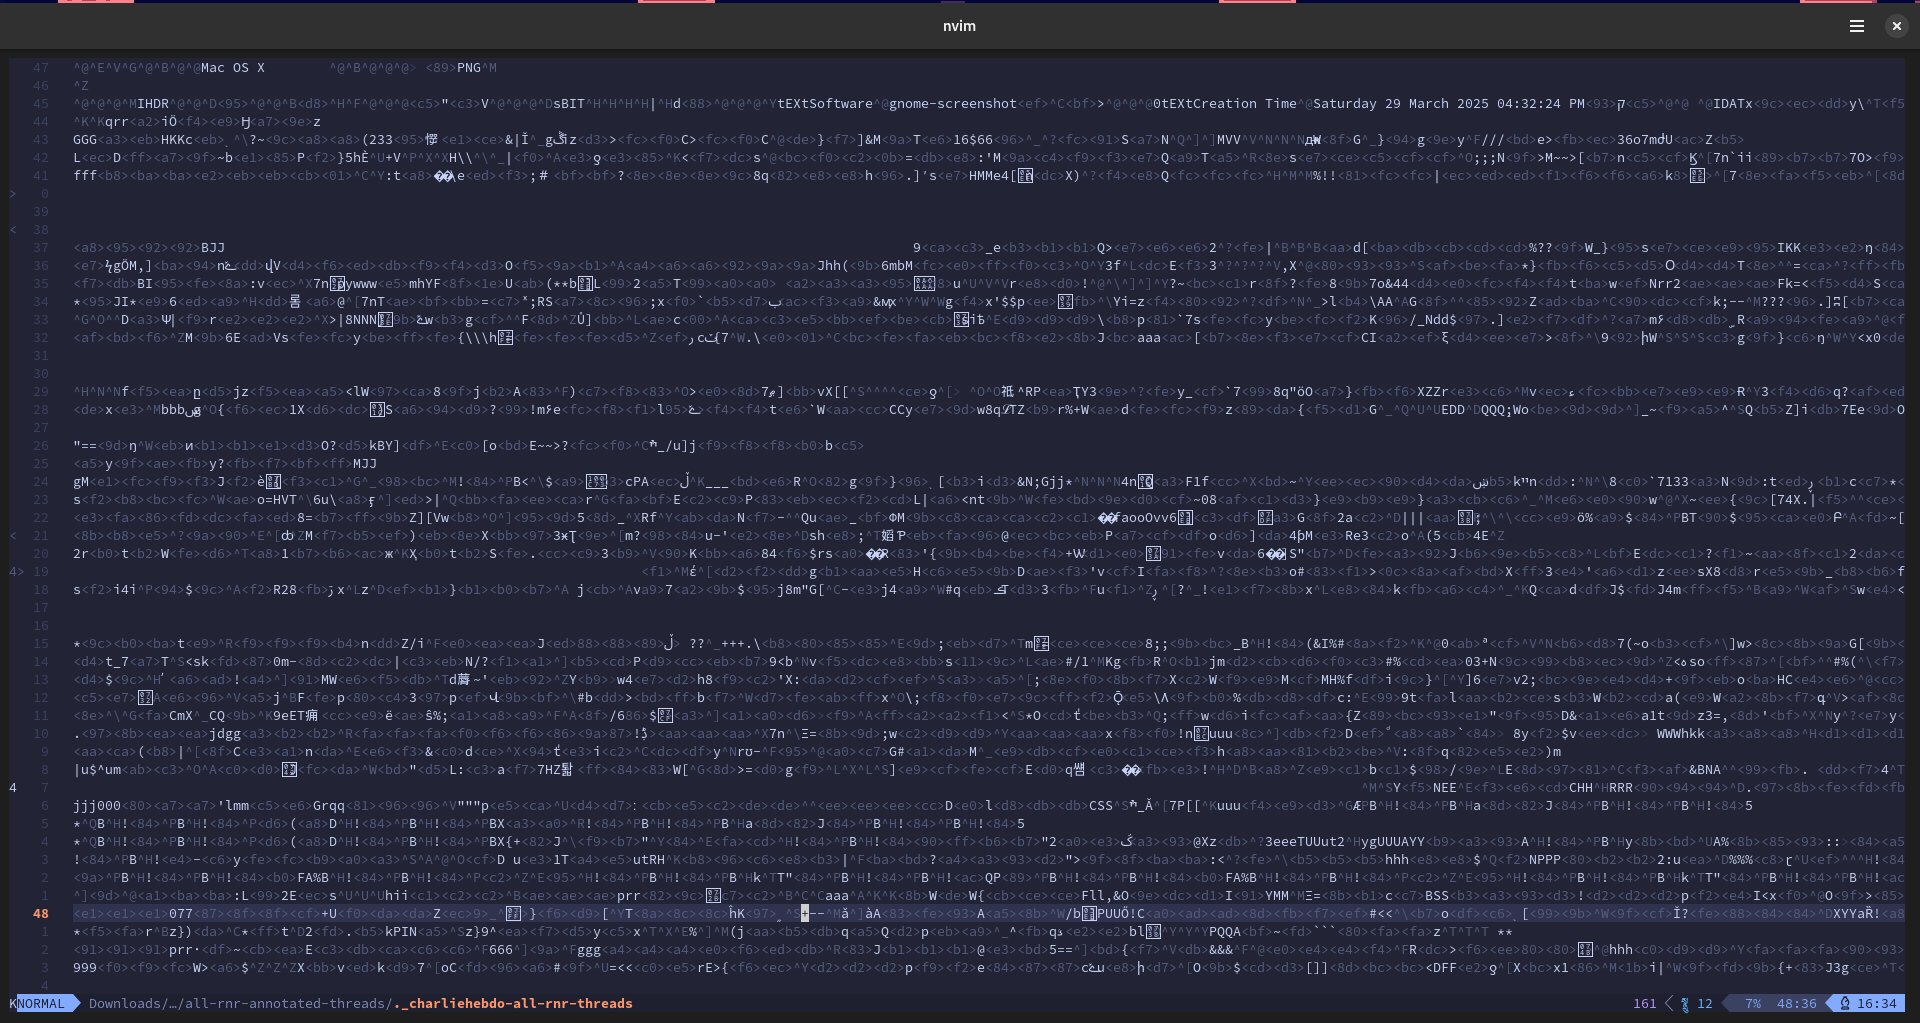<br>
**Fig. 2) One of the corrupted tweet files shown on NeoVIM.** <br><br><br>
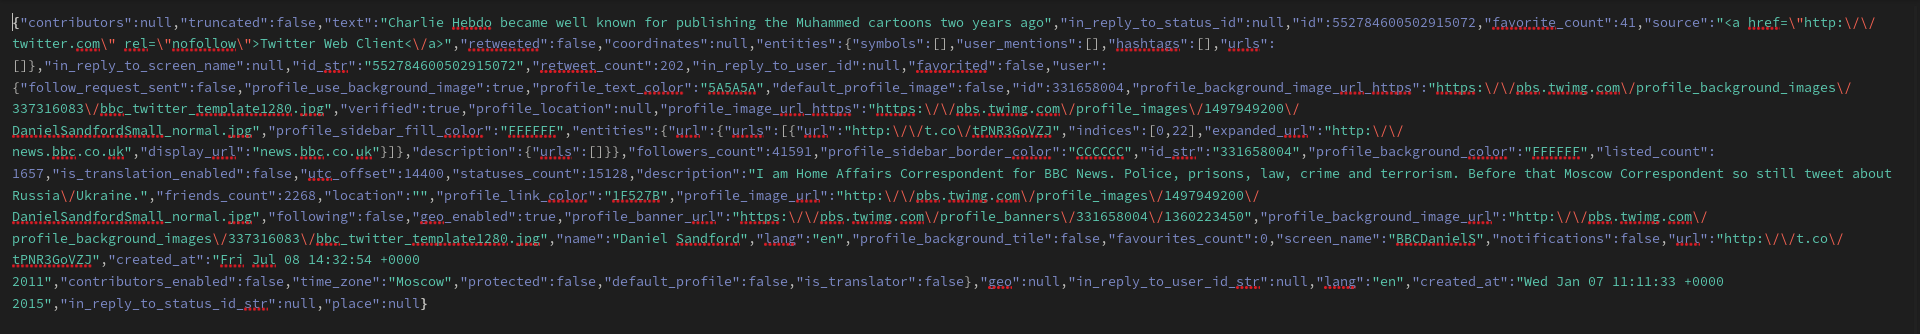<br>
**Fig. 3) How the non-corrupted tweet JSON should look like.** <br>
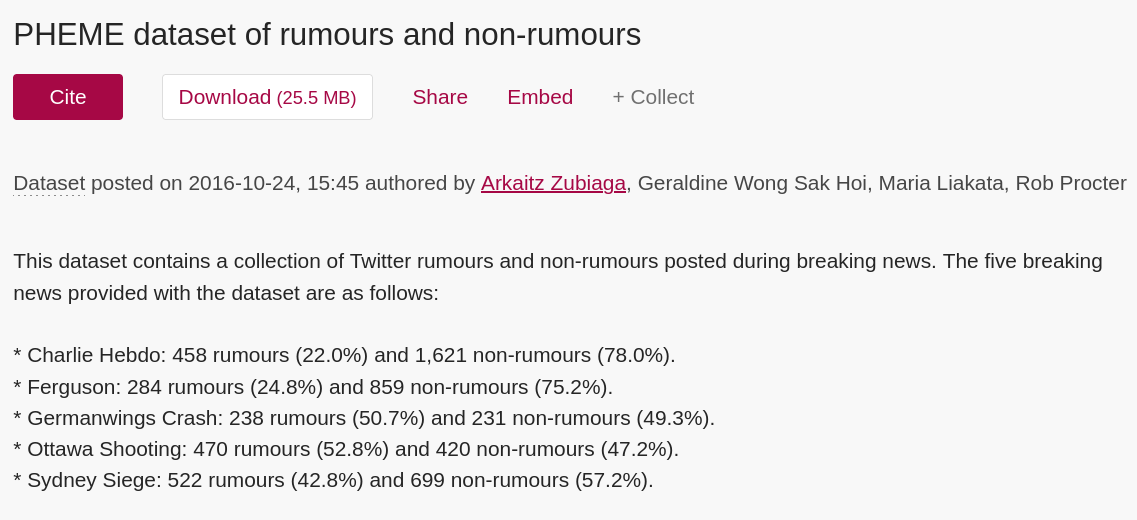

In [92]:
pheme_df = pd.DataFrame(pheme_data)
pheme_df.dropna(axis=0, inplace=True)
pheme_df.rename(columns={"content":"text"}, inplace=True)
pheme_df

,text,label
0,@tariqnasheed show his face and have Mike Brow...,1
1,@tariqnasheed anonymous named the wrong guy? D...,1
2,@tariqnasheed did you see how he was deliverin...,1
3,@tariqnasheed maybe it's an alias to cover his...,1
4,@tariqnasheed What do you think the outcome is...,1
...,...,...
111234,Gurlitt Kunstmuseum Bern update: There is no ...,0
111235,On the eve of a major announcement regarding t...,0
111236,"Swiss museum, German officials to announce fat...",0
111237,#Gurlitt's overlooked heirs want control of hi...,0


In [53]:
pheme_count_fake = (pheme_df["label"] == 1).sum()
pheme_count_true = (pheme_df["label"] == 0).sum()
pheme_count_na = (pheme_df["label"] == pd.NA).sum()
print(f"Number of true tweets in the PHEME Dataset: {pheme_count_true}")
print(f"Number of fake tweets in the PHEME Dataset: {pheme_count_fake}")
print(f"Number of unclassified tweets in the PHEME Dataset: {pheme_count_na}")

Number of true tweets in the PHEME Dataset: 79722
Number of fake tweets in the PHEME Dataset: 31517
Number of unclassified tweets in the PHEME Dataset: 0


In [60]:
current_df = pd.read_csv("/kaggle/input/output-for-twitterfakesnews-csv/output_for_twitterfakenews.csv")
current_df = current_df.loc[:, ['text', 'label']]
current_df.dropna(axis=0, inplace=True)

<ipython-input-60-3fc4fc3a264b>:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,15,17,19,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  current_df = pd.read_csv("/kaggle/input/output-for-twitterfakesnews-csv/output_for_twitterfakenews.csv")


In [85]:
curr_df = pd.concat([current_df[current_df['label']=='0'], current_df[current_df['label']=='1']])
curr_df['label'] = curr_df['label'].astype('int64')

In [86]:
curr_df

,text,label
23481,washington reuters the head of a conservative...,0
23482,washington reuters transgender people will be...,0
23483,washington reuters the special counsel invest...,0
23484,washington reuters trump campaign adviser geo...,0
23485,seattlewashington reuters president donald tr...,0
...,...,...
23476,st century wire says as wire reported earlier ...,1
23477,st century wire says it s a familiar theme whe...,1
23478,patrick henningsen st century wireremember wh...,1
23479,st century wire says al jazeera america will g...,1


In [113]:
output_csv = pd.concat([curr_df, pheme_df], ignore_index=True)
output_csv.dropna(inplace=True)
output_csv

,text,label
0,washington reuters the head of a conservative...,0
1,washington reuters transgender people will be...,0
2,washington reuters the special counsel invest...,0
3,washington reuters trump campaign adviser geo...,0
4,seattlewashington reuters president donald tr...,0
...,...,...
156105,Gurlitt Kunstmuseum Bern update: There is no ...,0
156106,On the eve of a major announcement regarding t...,0
156107,"Swiss museum, German officials to announce fat...",0
156108,#Gurlitt's overlooked heirs want control of hi...,0


In [119]:
output_csv.to_csv("output_for_pheme_and_twitter.csv", index=False, header=True)

In [127]:
outp = pd.read_csv("/kaggle/working/output_for_pheme_and_twitter.csv", engine='python')
outp.dropna(axis=0, inplace=True)
outp['label'] = outp['label'].astype('int64')
outp

,text,label
0,washington reuters the head of a conservative...,0
1,washington reuters transgender people will be...,0
2,washington reuters the special counsel invest...,0
3,washington reuters trump campaign adviser geo...,0
4,seattlewashington reuters president donald tr...,0
...,...,...
156146,Gurlitt Kunstmuseum Bern update: There is no ...,0
156147,On the eve of a major announcement regarding t...,0
156148,"Swiss museum, German officials to announce fat...",0
156149,#Gurlitt's overlooked heirs want control of hi...,0


In [138]:
truthseek_df = dataframes[12]
truthseek_df = truthseek_df.loc[:, ['tweet','BinaryNumTarget']]
truthseek_df.rename(columns = {"tweet": "text", "BinaryNumTarget": "label"}, inplace=True)

In [140]:
truthseek_df['label'] = truthseek_df['label'].astype('int64')

In [143]:
truthseek_df.dropna(axis=0, inplace=True)

In [144]:
truthseek_df

,text,label
0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,1
1,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1
2,THE SUPREME COURT is siding with super rich pr...,1
3,@POTUS Biden Blunders\n\nBroken campaign promi...,1
4,@OhComfy I agree. The confluence of events rig...,1
...,...,...
134193,Joe Biden's family owned African slaves....\n\...,0
134194,"Joe Bidens great, great grandfather was a slav...",0
134195,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",0
134196,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,0


In [145]:
output_csv2 = pd.concat([outp, truthseek_df], ignore_index = True)
output_csv2

,text,label
0,washington reuters the head of a conservative...,0
1,washington reuters transgender people will be...,0
2,washington reuters the special counsel invest...,0
3,washington reuters trump campaign adviser geo...,0
4,seattlewashington reuters president donald tr...,0
...,...,...
290303,Joe Biden's family owned African slaves....\n\...,0
290304,"Joe Bidens great, great grandfather was a slav...",0
290305,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",0
290306,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,0


In [147]:
output_csv2.to_csv("output_pheme_truthseeker_twitter.csv", index=False, header=True)

In [164]:
output_csv2['label'].value_counts()

label
0    166380
1    123928
Name: count, dtype: int64

In [165]:
liar_df = dataframes[14].iloc[:,[2,1]]
liar_df
liar_df.columns = ['text', 'label']

In [171]:
liar_df1 = dataframes[15].iloc[:,[2,1]]
liar_df1
liar_df1.columns = ['text', 'label']

In [172]:
liar_df2 = dataframes[16].iloc[:,[2,1]]
liar_df2
liar_df2.columns = ['text', 'label']

In [177]:
full_liar_df = pd.concat([liar_df, liar_df1, liar_df2], ignore_index=True)
full_liar_df['label'].unique()

array(['false', 'half-true', 'pants-fire', 'true', 'barely-true',
       'mostly-true'], dtype=object)

In [178]:
liar_mapping = {'true': 0, 'false': 1, 'half-true': 1, 'pants-fire': 1, 'barely-true': 1, 'mostly-true': 0}

In [181]:
full_liar_df['label'] = full_liar_df['label'].map(liar_mapping)

In [182]:
main_datasets_df = pd.concat([output_csv2, full_liar_df], ignore_index = True)
main_datasets_df

,text,label
0,washington reuters the head of a conservative...,0
1,washington reuters transgender people will be...,0
2,washington reuters the special counsel invest...,0
3,washington reuters trump campaign adviser geo...,0
4,seattlewashington reuters president donald tr...,0
...,...,...
303091,"For the first time in more than a decade, impo...",1
303092,Says Donald Trump has bankrupted his companies...,0
303093,"John McCain and George Bush have ""absolutely n...",0
303094,A new poll shows 62 percent support the presid...,1


In [200]:
reverse_mapping = {1:0,0:1}

In [202]:
welfake_df = dataframes[8].loc[:, ['text','label']]
welfake_df['label'] = welfake_df['label'].map(reverse_mapping)

In [203]:
main_datasets_df = pd.concat([main_datasets_df, welfake_df], ignore_index=True)

In [204]:
main_datasets_df.dropna(axis=0, inplace=True)

In [207]:
main_datasets_df.to_csv("main_datasets.csv",index=False, header=True)

# 3) Data Wrangling
Now that I have queried all the data files, I can now manipulate them to create one big data set.<br>
The most important features for this use case would be Content and the Label (whether it is true or false).<br> So we shall wrangle the data into having these two features alone.<br><br>
- [ ] [FakeNewsNet created by ASU](https://www.kaggle.com/datasets/mdepak/fakenewsnet) **(fakenewsnet)**
- [ ] [WELFake dataset](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification) **(fake-news-classification)**
- [x] ["TwitterFakeNews", a GitHub repository of scraped Twitter data](https://github.com/s-helm/twitterfakenews) **(twitterfakenews)**
- [ ] ["Fake News", another unnamed dataset from Kaggle](https://www.kaggle.com/datasets/hassanamin/textdb3/data) **(textdb3)**
- [ ] [ISOT Fake News Dataset](https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets) **(fake-news-detection-datasets)**
- [ ] ["Fake and Real News Data", an unnamed dataset from Kaggle](https://www.kaggle.com/datasets/subhajournal/fake-and-real-news-data) **(fake-and-real-news-data)**
- [x] [Truth Seeker Dataset 2023](https://www.kaggle.com/datasets/paulinepeps/truth-seeker-dataset-2023-truthseeker2023) **(truth-seeker-dataset-2023-truthseeker2023)**
- [x] [The LIAR Benchmark dataset](https://www.kaggle.com/datasets/lucihere/liar-dataset) **(liar-dataset)**
- [x] [PHEME dataset for Rumour Detection and Veracity Classification](https://www.kaggle.com/datasets/usharengaraju/pheme-dataset?select=PHEME_veracity) **(pheme-data)**

Most effective way to create the final dataset would be to take 20% of each dataset and keep them aside for testing. The rest can be for training. <br>
Bear in mind that **these are all still just DATAFRAMES, not the actual data we will use.** Some we might completely omit.

In [186]:
final_dataframe = pd.read_csv("/kaggle/working/main_datasets.csv")
final_dataframe

,text,label
0,washington reuters the head of a conservative...,0.0
1,washington reuters transgender people will be...,0.0
2,washington reuters the special counsel invest...,0.0
3,washington reuters trump campaign adviser geo...,0.0
4,seattlewashington reuters president donald tr...,0.0
...,...,...
303096,"For the first time in more than a decade, impo...",1.0
303097,Says Donald Trump has bankrupted his companies...,0.0
303098,"John McCain and George Bush have ""absolutely n...",0.0
303099,A new poll shows 62 percent support the presid...,1.0


Going through an example of the text, there seems to be a lot of unnecessary symbols in the data. We can use Regex expressions to remove them.<br>

In [188]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"\\W","", text)
    text = re.sub(r"\n", "", text)
    text = re.sub("https?:://\S+|www\.\S+","", text)
    text = re.sub("<.*?>+", "", text)
    text = re.sub("\w*\d\w", "", text)
    return text
    
def labeler(series, label):
    new_column = {label: [label] * len(series)}
    new_column = pd.DataFrame(new_column)
    output = pd.concat([series, new_column], ignore_index = False)
    output.columns = ['text', 'label']
    output['label'].fillna(label)
    return output

In [192]:
final_dataframe['text'] = final_dataframe['text'].apply(clean_text)

In [193]:
final_dataframe

,text,label
0,washington reuters the head of a conservative...,0.0
1,washington reuters transgender people will be...,0.0
2,washington reuters the special counsel invest...,0.0
3,washington reuters trump campaign adviser geo...,0.0
4,seattlewashington reuters president donald tr...,0.0
...,...,...
303096,for the first time in more than a decade impor...,1.0
303097,says donald trump has bankrupted his companies...,0.0
303098,john mccain and george bush have absolutely no...,0.0
303099,a new poll shows percent support the presiden...,1.0


In [194]:
final_dataframe.to_csv("cleaned_main_datasets.csv",index=False, header=True)

In [195]:
final_dataframe.head()

,text,label
0,washington reuters the head of a conservative...,0.0
1,washington reuters transgender people will be...,0.0
2,washington reuters the special counsel invest...,0.0
3,washington reuters trump campaign adviser geo...,0.0
4,seattlewashington reuters president donald tr...,0.0
